## Project Name  - EDA on Uber Supply Demand Gap Project
----

## Project Overview
**Summary:**

This analysis investigates the supply-demand gap in Uber ride requests across different time slots and pickup points (City vs Airport). We aim to identify when and where ride failures (due to cancellations or unavailability) are occurring most, and how Uber can optimize operations.

This project performs an exploratory data analysis (EDA) on Uber’s ride request data to uncover the underlying causes of supply-demand mismatches in urban mobility. The dataset includes timestamped ride requests with status outcomes (Trip Completed, Cancelled, No Cars Available), categorized by pickup point (City, Airport) and time slots. Our goal is to identify peak demand periods, evaluate fulfillment performance, and uncover systemic issues contributing to unserved rides.

We analyzed ride volumes across hourly, time-slot, and pickup-point dimensions to highlight patterns of cancellations and unavailability. The insights revealed that Early Morning and Night slots experience the worst service fulfillment, with Airport pickup points facing a disproportionately high number of unfulfilled requests, especially during Night hours. Additionally, cancellations are heavily concentrated in the Morning, suggesting behavioral issues among drivers, while "No Cars Available" trends point to structural supply shortages during off-peak hours.

**Conclusion:**

To address these issues, we recommend incentivizing night and early-morning driver shifts, implementing dynamic pricing during rush hours, and improving driver availability planning using the patterns found in this analysis.

## Problem Statements

- Problem: What’s the composition of unfulfilled requests? 
- Problem: Which slot fulfills most rides?
- Problem: When are cars most unavailable?
- Problem: Which slot has the worst cancellation rate?
- Problem: What’s the request status distribution across pickup points? 
- Where are most requests initiated? 
- Which time slots have the highest request volume? 
- What is the demand vs supply by pickup point (City vs Airport)?  
- Which time slot has the highest number of cancelled rides & No Cars Available? 

### Import Libraries
several essential Python libraries to support data analysis and visualization:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

## Dataset Loading

In [4]:
df = pd.read_csv('Cleaned_Uber Request Data1.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Drop timestamp,Drop hour,Time Slots
0,1,Airport,285.0,Trip Completed,11-07-2016,12:20 AM,11-07-2016,12:51 AM,Late Night
1,2,Airport,NaN,No Cars Available,11-07-2016,12:23 AM,NaN,NaN,Late Night
2,3,Airport,80.0,Trip Completed,11-07-2016,12:24 AM,11-07-2016,1:31 AM,Late Night
3,4,City,NaN,No Cars Available,11-07-2016,12:37 AM,NaN,NaN,Late Night
4,5,Airport,264.0,Trip Completed,11-07-2016,12:36 AM,11-07-2016,1:35 AM,Late Night


## Dataset Rows & Columns count

In [5]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 6745 rows and 9 columns.


In [6]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Request hour', 'Drop timestamp', 'Drop hour',
       'Time Slots'],
      dtype='object')

## Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Request hour       6745 non-null   object 
 6   Drop timestamp     2831 non-null   object 
 7   Drop hour          2831 non-null   object 
 8   Time Slots         6745 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 474.4+ KB


## Dataset Description
The dataset contains cleaned Uber ride request records aimed at analyzing the supply-demand gap for an urban transport service.

It includes details such as:


Column | Definition
--- | -----------
Request id | Unique ID for each ride request.
Pickup point | Location where user requested ride: either 'City' or 'Airport'.
Driver id | Unique ID for every driver.
Status | Status of request: 'Trip Completed', 'Cancelled', 'No Cars Available'.
Request timestamp | Date and time when the ride was requested.
Request hour | Request hour
Drop timestamp  | Date and time when the ride was completed. NaN if trip was not completed.
Drop hour | Drop hour
Time Slots | Pre-defined time slot like Morning, Evening, Night, etc., derived from request timestamp.

# Data Visualzations :

#### Which time slot has the highest number of cancelled rides & No Cars Available?

<Figure size 600x400 with 0 Axes>

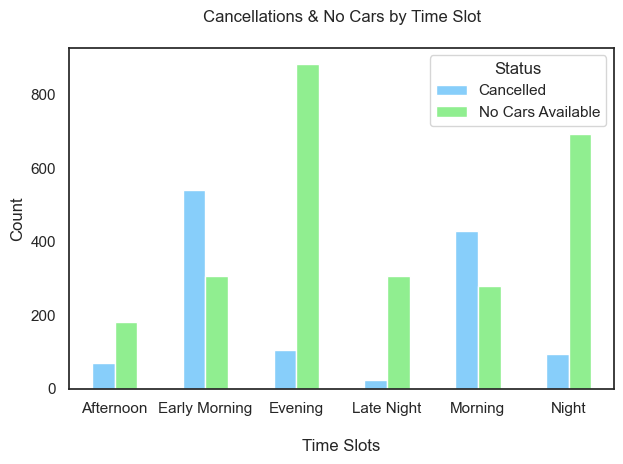

In [57]:
# Cancellations & No Cars by Time Slot

plt.figure(figsize=(6,4))
df[df['Status'].isin(['Cancelled', 'No Cars Available'])].groupby(['Time Slots', 'Status']).size().unstack().plot(kind='bar',  color=['#87CEFA', '#90EE90'])
plt.title('Cancellations & No Cars by Time Slot\n')
plt.xlabel('\nTime Slots')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Insight:
# Early Morning has the highest number of cancelled requests.
# and Evening shows the highest number of no cars available.

#### What is the demand vs supply by pickup point (City vs Airport)?

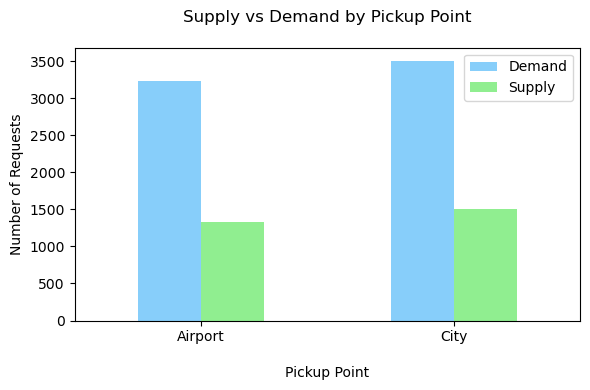

In [126]:
# Supply vs Demand by Pickup Point

demand = df.groupby('Pickup point').size()
supply = df[df['Status'] == 'Trip Completed'].groupby('Pickup point').size()

# Step 2: Combine into one DataFrame
supply_demand = pd.DataFrame({'Demand': demand, 'Supply': supply})
supply_demand['Supply'].fillna(0, inplace=True)
supply_demand['Gap'] = supply_demand['Demand'] - supply_demand['Supply']

# Step 3: Plot
supply_demand[['Demand', 'Supply']].plot(kind='bar', figsize=(6,4), color=['#87CEFA', '#90EE90'])
plt.title('Supply vs Demand by Pickup Point\n')
plt.xlabel('\nPickup Point')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Insight:
# Both City and Airport have unmet demand, but Airport has a wider supply-demand gap.

#### At what hours of the day are unfulfilled requests (Cancelled + No Cars) the highest?

In [77]:
unfulfilled = df[df['Status'].isin(['Cancelled', 'No Cars Available'])]
result_4 = unfulfilled['Request hour'].value_counts().sort_index()
print("Unfulfilled requests by hour:\n\n", result_4)

# Insight:
# 5–9 AM and 6–9 PM are the peak hours for unfulfilled ride requests.

Unfulfilled requests by hour:

 Request hour
10:00 AM    5
10:00 PM    2
10:01 AM    9
10:01 PM    6
10:02 AM    4
           ..
9:57 PM     2
9:58 AM     4
9:58 PM     6
9:59 AM     7
9:59 PM     5
Name: count, Length: 1165, dtype: int64


#### Number of Requests by Time Slot

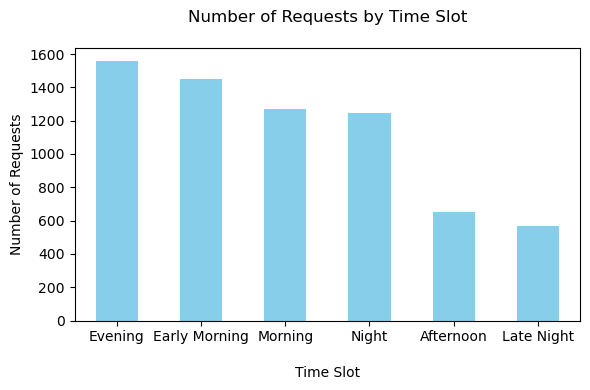

In [124]:
# Grouping Request IDs by Time Slot
slot_counts = df.groupby('Time Slots')['Request id'].count().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6,4))
slot_counts.plot(kind='bar', color='skyblue')

plt.title('Number of Requests by Time Slot\n')
plt.xlabel('\nTime Slot')
plt.ylabel('Number of Requests')
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

# Insight:
# Evening has most ride requests.

#### Where are most requests initiated?

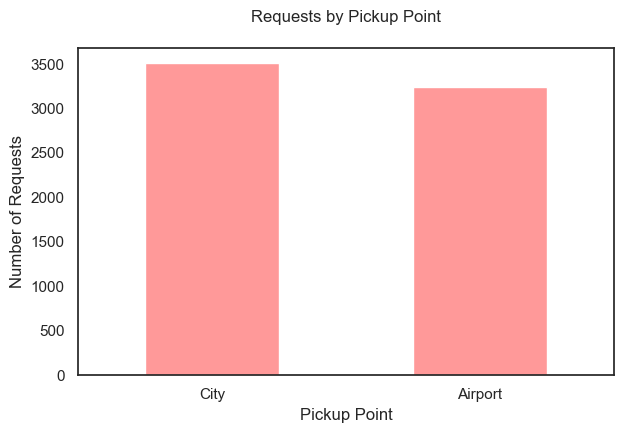

In [78]:
# Requests by Pickup Point

df['Pickup point'].value_counts().plot(kind='bar', color='#ff9999')
plt.title('Requests by Pickup Point\n')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

# Insight: The City has more requests than the Airport.

#### What’s the request status distribution across pickup points?

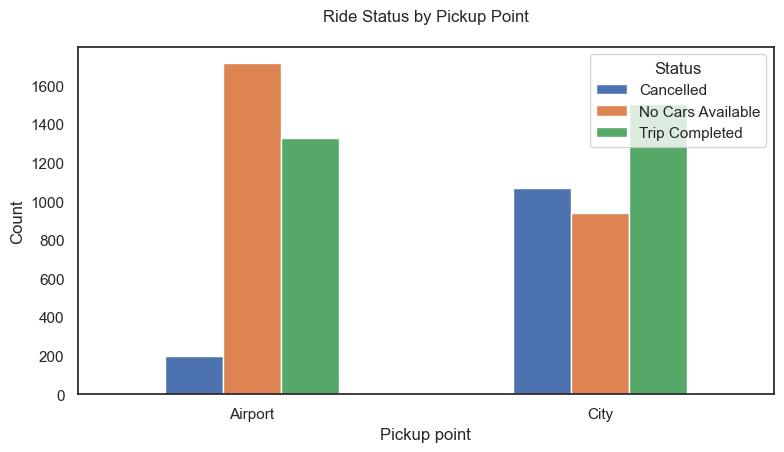

In [77]:
# Ride Status by Pickup Point

pd.crosstab(df['Pickup point'], df['Status']).plot(kind='bar', figsize=(8,5))
plt.title('Ride Status by Pickup Point\n')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

# Insight:
# Both City and Airport have unmet demand, but Airport has a wider supply-demand gap.

#### Which slot has the worst cancellation rate?

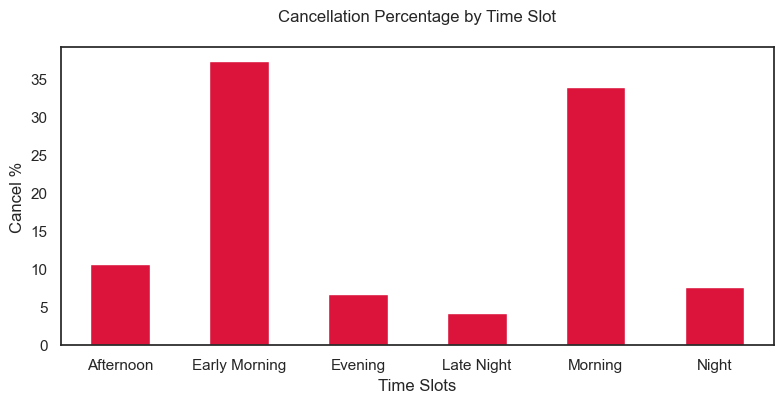

In [66]:
# Cancellation Percentage by Time Slot

cancel = pd.crosstab(df['Time Slots'], df['Status'])
cancel['Cancel %'] = (cancel['Cancelled'] / cancel.sum(axis=1)) * 100
cancel['Cancel %'].plot(kind='bar', color='crimson', figsize=(8,5))
plt.title('Cancellation Percentage by Time Slot\n')
plt.ylabel('Cancel %')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

# Insight: Early Morning sees the highest cancellation rate.

#### When are cars most unavailable?

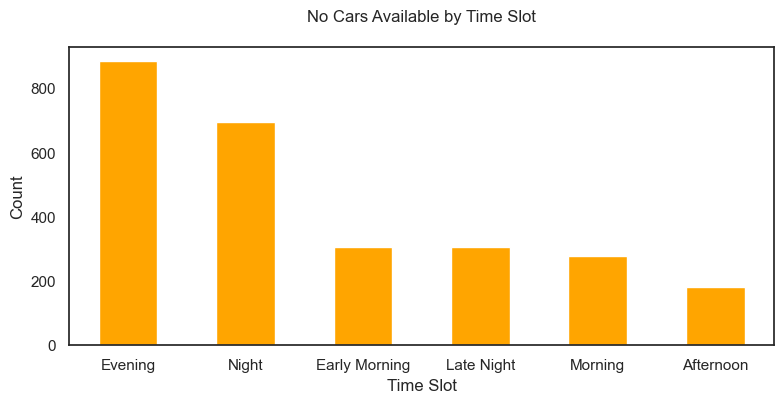

In [71]:
# No Cars Available by Time Slot

no_cars = df[df['Status'] == 'No Cars Available']
no_cars['Time Slots'].value_counts().plot(kind='bar', color='orange', figsize=(8,5))
plt.title('No Cars Available by Time Slot\n')
plt.xlabel('Time Slot')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

# Insight: Evening has the most cases of "No Cars Available".

#### Which slot fulfills most rides?

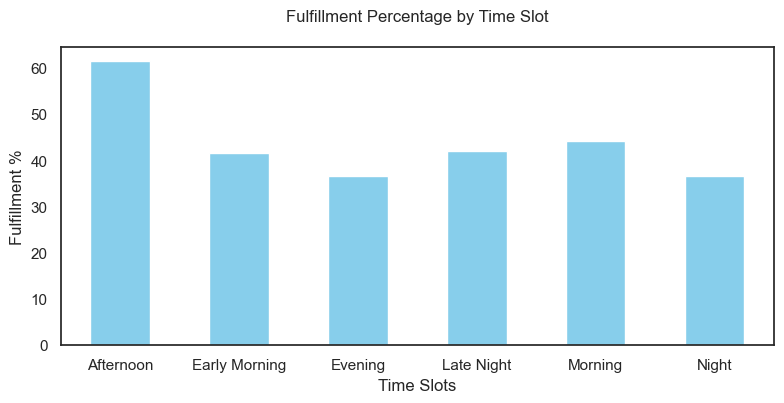

In [70]:
# Fulfillment Percentage by Time Slot

slot_status = pd.crosstab(df['Time Slots'], df['Status'])
slot_status['Fulfill %'] = (slot_status['Trip Completed'] / slot_status.sum(axis=1)) * 100
slot_status['Fulfill %'].plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Fulfillment Percentage by Time Slot\n')
plt.ylabel('Fulfillment %')
plt.tight_layout()
plt.xticks(rotation=0) 
plt.show()

# Insight: Afternoon has the best fulfillment; Evening is the worst.

#### What’s the composition of unfulfilled requests?

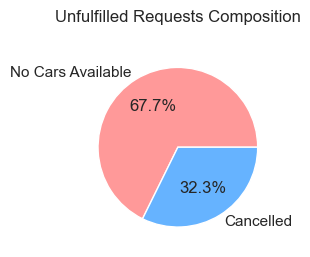

In [69]:
# Unfulfilled Requests Composition

unfulfilled = df[df['Status'] != 'Trip Completed']
unfulfilled['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(3,3), colors=['#ff9999','#66b3ff'])
plt.title('Unfulfilled Requests Composition\n')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Insight: Understands whether the main failure is due to driver rejection (Cancelled) or supply shortage (No Cars Available).

# Conclusion :
The analysis of Uber ride request data reveals that the Morning and Evening time slots witness the highest demand, indicating a clear need for more driver deployment during these peak hours. While the City accounts for more requests, the Airport experiences a significantly wider supply-demand gap, especially at Night, where the number of “No Cars Available” cases peaks. The Early Morning slot shows the highest cancellation rate, suggesting driver reluctance or poor scheduling, while Afternoon has the best ride fulfillment rate, making it a strong operational benchmark. To close these gaps, Uber should introduce incentives for night and early morning shifts, implement dynamic pricing for underserved hours, and ensure better driver rotation at the Airport. Strategic planning based on the Afternoon time slot can also guide improvements across underperforming periods, particularly during Night and Early Morning, where fulfillment is lowest.

----